# Least Action with least squares minimization 

Load modules

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.optimize 
import pandas as pd
global g  
g=9.8

<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/leastaction1.svg?sanitize=true">
</div>

## Geometry interpretation
Following the geometry theory developed [here](http://www.eftaylor.com/software/ActionApplets/LeastAction.html), we will try to define something called the _Action_ for one small segment of the free fall movement in one-dimension. 

For that we need the experimental data consisting on the height of an object of mass $m$ in free fall, and the height $x_i$, for each time $t_i$. We take the origin of the coordinates at ground level. For each segment we can calculate an average kinetic energy, $T$, and an averge potential energy, $V$, in the limit of $\Delta t=t_2-t_1$ small. From the figure

\begin{align}
T=\frac12 m v^2\approx &\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2\,,&
V=mgh\approx& m g \frac{x_2+x_1}{2}\,.
\end{align}

We can then reformulate the problem of the free fall in the following terms. From all the possible curves that can interpolate the points $(t_1,x_1)$ and $(t_2,x_2)$, which is the correct one?. 

The answer obtained by Leonhard Euler [1] can be obtained from the definition of the function "Lagrangian"
$$L(t)=T(t)-V(t)\,.$$

<!--<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/leastaction2.svg?sanitize=true">
</div>-->

With this, we can build the "Action", by integrating the Lagrangian function between the points $(t_1,x_1)$ and $(t_2,x_2)$ as
$$S=\int_{t_1}^{t_2} L\, \operatorname{d}t\,. $$

which give us a numerical result with units of energy multiplied by time (J$\cdot$s). What is worth noticing is that if we relax the definition of $V$ and allows for any $h$, but keeping the initial and final points fixed, we can calculate many Action values. This is illustrated in the figure for blue dotted ($S_1$), solid ($S_{\text{min}}$) and dashed ($S_2$)lines. But only the height, $(x_1+x_2)/2$ , associated with the real physical path, has a minimum value for the Action, $S_{\text{min}}$!

In fact, for one segment of the action between $(t_1,x_1)$, and $(t_2,x_2)$, with $\Delta t$ sufficiently small such that $L$ can be considered constant, we have
\begin{eqnarray}
S=\int_{t_1}^{t_2} L dt &\approx& L\Delta t \\
&\approx& \left[\frac12 m v^2-m g h \right]\Delta t\\
&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}
that corresponds to Eq. (11) of Am. J. Phys, Vol. 72(2004)478: http://www.eftaylor.com/pub/Symmetries&ConsLaws.pdf

<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/leastaction3.svg?sanitize=true">
</div>

__Least Action method__: The least action method consist in the following steps illustrated in the figure
1. Fix the initial and final point of the movement. Example the initial time and the height from which a body is launched upwards, $(t_{\text{ini}},x_{\text{ini}})$, and the final time and height $(t_{\text{end}},x_{\text{end}})$.
1. Divide the problem in small segments of $\Delta t=t_{i+1}-t_i$.
1. Build many paths with the initial and final point fixed and calculates the Action in each segment, $S_i$, for all the paths
1. Choose the minimal Action for each segment, $S_{\text{min}}^i$, and rebuild the full path which minimizes the Action in each segment. This is the physical trajectory!



## Code implementation

### The Action
We define the Action $S$ such of an object of mass $m$ throw vertically upward from $x_{\hbox{ini}}$, such that $t_{\hbox{end}}$ seconds later the object return to a height $x_{\hbox{end}}$, as
\begin{eqnarray}
S&=&\int_{t_{\hbox{ini}}}^{t_{\hbox{end}}} L\, {\rm d}t \\
&=&\sum_i L_i \Delta t\\
&=& \sum_i S_i\,,
\end{eqnarray}
where
\begin{eqnarray}
S_{i}=L_i \Delta t
&\approx& \left[\frac12 m\left(\frac{x_{i+1}-x_i}{t_{i+1}-t_i}\right)^2-m g \frac{x_{i+1}+x_i}{2} \right](t_{i+1}-t_i)\\
&=& \left[\frac12 m\left(\frac{\Delta x_i}{\Delta t}\right)^2-m g \frac{x_{i+1}+x_i}{2} \right]\Delta t
\end{eqnarray}

We implement the code by using _linear algebra abstractions_. Consider the vector of positions in meters
$$\boldsymbol{x}=(x_{1},x_2,...,x_{n-1},x_{n}).$$
We can define the vector of initial (final) positions of $n-1$ components as
\begin{align}
\boldsymbol{x}_{\text{initial}}=&(x_{1},x_2,\ldots,x_{n-1}),\\
\boldsymbol{x}_{\text{final}}=&(x_2,x_3,\ldots,x_{n}),\\ 
\boldsymbol{x}_{\text{final}}+\boldsymbol{x}_{\text{initial}}=&
(x_2+x_1,x_3+x_2,\ldots,x_{i+1}+x_i,\ldots,x_{n}+x_{n-1}),
\end{align}
such that, for example
$$\sum_i x_{i+1}+x_i=\sum_i (\boldsymbol{x}_{\text{final}}+\boldsymbol{x}_{\text{initial}})_i $$

Therefore:
$$
S=\sum_i\left[\frac12 m\left(\frac{\left(\boldsymbol{x}_{\text{final}}-\boldsymbol{x}_{\text{initial}}\right)_i}{\Delta t}\right)^2-m g \frac{\left(\boldsymbol{x}_{\text{final}}+\boldsymbol{x}_{\text{initial}}\right)_i}{2} \right]\Delta t
$$


__Example__: For the vector $\boldsymbol{x}=(1,3,6,8)$, implement the 
$\sum_i x_{i+1}+x_i$, as a linear algebra abstraction in Python

In [3]:
x=np.array([1,3,6,8])
#Initial points: x_i:
x[:-1]

array([1, 3, 6])

In [4]:
#final points: x_{i+1}
x[1:]

array([3, 6, 8])

$\sum_i x_{i+1}+x_i=\sum_i (\boldsymbol{x}_{\text{final}}+\boldsymbol{x}_{\text{intial}})_i=
\sum_i(4,9,14)=27$:

In [5]:
x[1:]+x[:-1]

array([ 4,  9, 14])

In [6]:
(x[1:]+x[:-1]).sum()

27

In [7]:
x[:-1].size

3

The clear advantage of the linear algebra abstractions is that we avoid the use of the very slow `for` loops of Python. We can now define the Action by using this kind of abstractions in  a very compact way

* Function
$$
S=\sum_i\left[\frac12 m\frac{\left(\boldsymbol{x}_{\text{final}}-\boldsymbol{x}_{\text{initial}}\right)_i^2}{\Delta t^2}-\frac{1}{2}m g \left(\boldsymbol{x}_{\text{final}}+\boldsymbol{x}_{\text{initial}}\right)_i \right]\Delta t
$$

* Program

In [18]:
import numpy as np
def S(x,tend=3.,m=0.2,xini=0.,xend=0.,g=9.8):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    x=np.asarray(x)    
    Δt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Δt**2-0.5*m*g*(x[1:]+x[:-1]))*Δt).sum()
#Other functions...
#Main program:
print(__name__)
if __name__=='__main__':
    print(S([0,3,5,6,2,0]))

__main__
-13.149333333333335


* As code

In [19]:
%%writefile action.py
#!/usr/bin/env python3
import numpy as np
def S(x,tend=3.,m=0.2,xini=0.,xend=0.,g=9.8):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    x=np.asarray(x)    
    Δt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Δt**2-0.5*m*g*(x[1:]+x[:-1]))*Δt).sum()
#Other functions...
#Main program:

#Check Python behaviour
print(__name__)

if __name__=='__main__':
    print(S([0,3,5,6,2,0]))

Writing action.py


In [20]:
!python3 action.py

__main__
-13.149333333333335


In [21]:
!chmod a+x action.py

In [22]:
!ls -l action.py

-rwxr-xr-x 1 restrepo restrepo 672 Oct 20  2022 action.py


In [23]:
!./action.py

__main__
-13.149333333333335


In [24]:
import action

action


In [25]:
action.S([0,2,3,0])

-8.400000000000002

In this way, for a non-physical trajectory,  we have for example

In [26]:
S([0,8,45,3,0]) #J.s

345.1466666666667

## Least Action calculation

_Problem_: Let an object of mass $m=0.2$ Kg throw vertically updward and returning back to the same hand after 3 s. Find the function of distance versus time of least Action. 

If we denote the height at time $t_i$ as $x_i=x(t_i)$, we can calculate the action for any set of $x_i$ points with the inititial and final points fixed at $0\ $m.

__Example__: By using the previous definition, calculates the Action for 21 steps in time from $0$ at $3\ $s for an object that does not move at all

__Solution__:

In [27]:
x=np.zeros(21)
S(x)

0.0

__Activity__:  _Brute force approach_

Open the Activity notebook in [CoCalc!](https://cocalc.com/projects/a8330cfb-9dfb-442e-9b2b-ba664e31a685/files/Activity_Least_Action.ipynb?session=default)

1) calculates the Action for 21 steps in time from $0$ at $3\ $s, for an object that at a random position in each time between zero and $15\ $m, but with the initial and final positions set to zero. Make the plot for the random curve. 

Let us divide the intervals in 21 parts:

In [28]:
np.random.uniform(0,15,21)

array([ 4.64122617, 13.70423996,  6.95396288,  6.57862379, 14.21835864,
        1.13709587,  4.4240718 , 12.52860655,  7.25385205,  4.62752913,
       10.38313134,  9.79150182,  1.24341099,  6.61737807,  2.74212911,
        0.35962101,  9.59793162,  6.31478544,  2.18455033,  6.58584539,
        9.1941027 ])

In [29]:
#Initialize with the maximum possible value
Smin=np.inf
#np.random.seed(1)
for i in range(100000):
    #21 one random number between 0 and 15
    x=np.random.uniform(0,15,21)
    # Force the boundary conditions
    x[0]=0
    x[-1]=0
    Sx=S(x)
    if Sx<Smin:
        #Get new minimum
        Smin=Sx
        xmin=x
        print(Smin)

597.6381687719575
537.5945063085833
455.2151760672509
450.2257266431184
343.1801323574472
322.79632574430786
165.23680792365536
135.05109135728466
120.61301056863843
95.29574281223262
75.91521871247811
62.2438503408384


Check again the Acion, $S$, value for `xmin`

2) Find the set of interpolation Lagrange polinomial that a set a points as smooth as possible

In [26]:
from scipy import interpolate

Assign a time, $t_i$ to each $x_i$ point in `xmin`

In [27]:
tx=np.linspace(0,3,len(xmin))

Complete the set of interpolation Lagrange polynomials: Change `pe` to the high value that allows for on smooth curve, and uncomment the next code and repeat as many times as required

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(-0.1, 3.3)

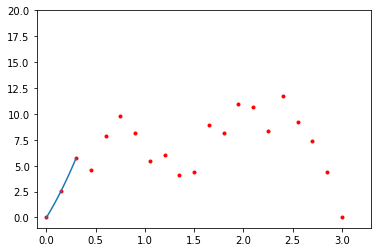

In [29]:
p=[]
plt.plot(tx,xmin,'r.')
pi=0
pe=3
L=interpolate.lagrange(tx[pi:pe],xmin[pi:pe])
txx=np.linspace(tx[pi],tx[pe-1])
plt.plot(txx,L(txx))
#Repeat to get a fit as smoot as possible
#pi=pe-1
#pe=8
#L=interpolate.lagrange(tx[pi:pe],xmin[pi:pe])
#txx=np.linspace(tx[pi],tx[pe-1])
#plt.plot(txx,L(txx))

plt.ylim(-1,20)
plt.xlim(-0.1,3.3)

3) Built a step function for the full range each of the interpolation Lagrangian polynomial in each range

<!--
'''python
p=[1,3,8,18,21]
L=[]
ts=[]
plt.plot(tx,xmin,'r.')
for i in range(len(p)):
    if i<len(p)-1:
        L.append(interpolate.lagrange(tx[p[i]-1:p[i+1]],xmin[p[i]-1:p[i+1]]))
        txx=np.linspace(tx[p[i]-1],tx[p[i+1]-1])
        plt.plot(txx,L[-1](txx))
        ts.append(tx[p[i]-1])
        plt.vlines(ts,-1,20,linestyles=':')

def ff(t):
    if t<0:
        return 0
    if t>=3:
        return 0
    for i in range(len(ts)-1):
        if t >= ts[i] and t<ts[i+1]:
            return L[i](t)
f=np.vectorize(ff)
x=f(tt)
P=np.poly1d( np.polyfit(tx,xmin,deg=2) )
xP=P(tt)
xP[0]=0
xP[-1]=0
plt.plot(tt,xP,'--')
plt.ylim(-1,20)
plt.xlim(-0.1,3.3)
plt.grid()
'''
-->

4) Build a step function with `interpolate.interp1d`

5) Fit the points with a polynomial of degree 2

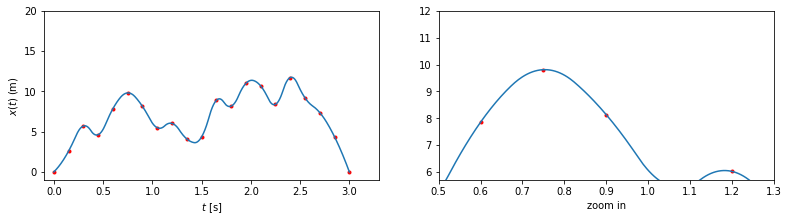

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
p=[]
pi=0
pe=21
x1d=interpolate.interp1d(tx[pi:pe],xmin[pi:pe],kind=2)
txx=np.linspace(tx[pi],tx[pe-1],1000)
ax1.plot(tx,xmin,'r.')
ax1.plot(txx,x1d(txx))
ax1.set(xlim=(-0.1,3.3),ylim=(-1,20),
        xlabel='$t$ [s]',ylabel='$x(t)$ (m)')

ax2.plot(tx,xmin,'r.')
ax2.plot(txx,x1d(txx))
ax2.set(xlim=(0.5,1.3),ylim=(5.7,12),
        xlabel='zoom in')

fig.tight_layout(pad=4.0)


In [31]:
# Plot results 3) and 4) here

5) Compare the Action for `xmin`, some `x` obtained from the full range function obtained from the interpolation Lagrange polynomials, and some `xP` obtained from the degree 2 polynomial

In [32]:
S(xmin)

45.24858427791141

In [33]:
#S for step function here

In [34]:
S(x1d(txx))

58.12952608666362

In [54]:
#S for degree 2 function here

Which one is the one with the least action and why?

### Minimization

Function to find the least Action by using `scipy.optimize.fmin_powell`. It start from $\mathbf{x}=(x_{\hbox{ini}},0,0,\ldots,x_{\hbox{end}})$ and find the least action

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pi']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [30]:
import scipy.optimize as optimize
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    x0[0]=xini;x0[-1]=xend
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=x.max()
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

In [31]:
t=3.
m=0.2
y=xfit(21,t,m,ftol=1E-16)
x=y[0]
xmax=y[1]
Smin=y[2]
Δt=y[3]
tx=np.arange(0,t+Δt,Δt)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 44
         Function evaluations: 11765


In [32]:
xmax

11.024999971128686

### Plot

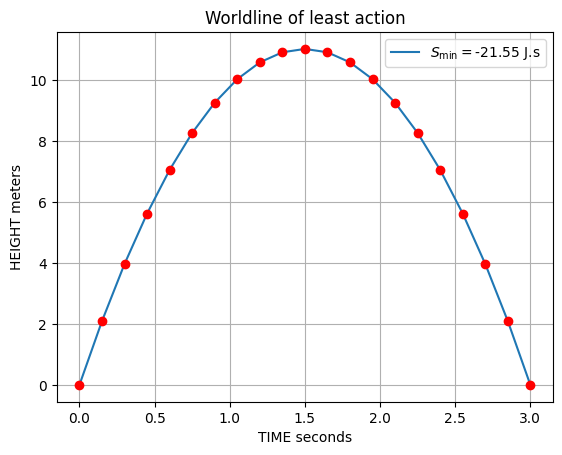

In [33]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')
plt.grid()

Check the equation of motion: 
$$x(t)=-\frac{{1}}{{2}}gt^2+v_0t$$

In [34]:
P=poly1d ( np.polyfit(tx,x,2),variable='t' )
print(P)

      2
-4.9 t + 14.7 t - 3.376e-08


In [35]:
P(1.5)

11.02499999738754

### Dynamics of the least action solution

#### Velocity

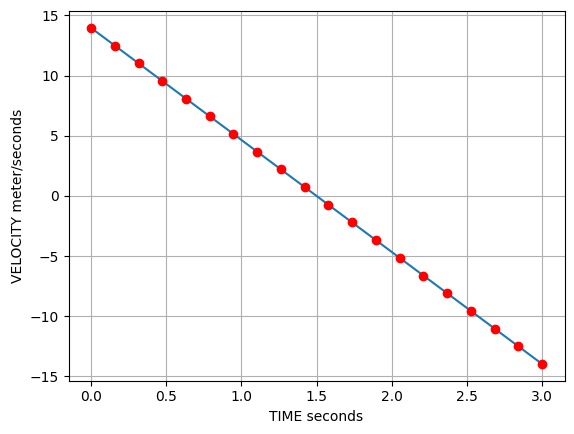

In [41]:
v=(x[1:]-x[:-1])/Δt
Δt=t/v[:-1].size 
tx=np.arange(0,t+Δt,Δt)
plt.plot(tx,v)
plt.plot(tx,v,'ro')
plt.xlabel('TIME seconds')
plt.ylabel('VELOCITY meter/seconds')
plt.grid()

#### Aceleration

array([-9.79999824, -9.79999574, -9.80000624, -9.79999865, -9.79999704,
       -9.80000132, -9.80000025, -9.80000112, -9.79999997, -9.79999916,
       -9.79999763, -9.80000251, -9.80000069, -9.79999859, -9.8000008 ,
       -9.79999997, -9.80000049, -9.79999868, -9.80000147])

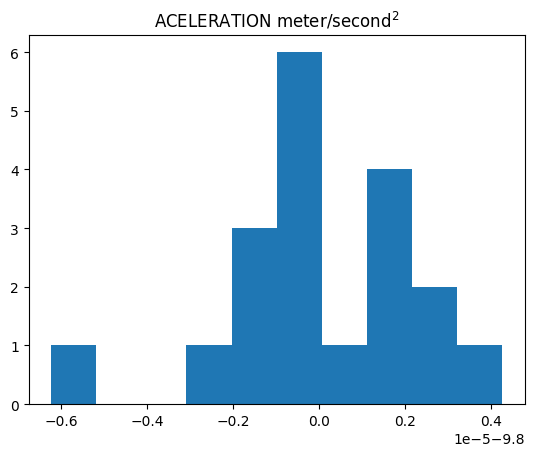

In [42]:
Δt=t/x[:-1].size
a=(v[1:]-v[:-1])/Δt
pa=plt.hist(a)
plt.title('ACELERATION meter/second$^2$')
a

#### Energy

In [43]:
g=9.8
T=0.5*m*v**2
V=0.5*m*g*(x[1:]+x[:-1])
E=T+V
print(np.round(E,2))

[21.55 21.55 21.55 21.55 21.55 21.55 21.55 21.55 21.55 21.55 21.55 21.55
 21.55 21.55 21.55 21.55 21.55 21.55 21.55 21.55]


#### Action

The Action is minimal in each interval!

In [45]:
SS=(T-V)*Δt
SS

array([ 2.61738999,  1.45050412,  0.41327232, -0.49430598, -1.2722299 ,
       -1.92049981, -2.43911586, -2.82807787, -3.08738588, -3.21703987,
       -3.21703987, -3.0873859 , -2.82807788, -2.43911586, -1.9204999 ,
       -1.27222988, -0.49430587,  0.41327215,  1.45050408,  2.61739017])

In [46]:
SS.sum()

-21.554977499999996

In [47]:
import scipy.constants as sc

In [48]:
sc.hbar

1.0545718176461565e-34

In [49]:
print( 'S_MINIMUM={}  Joules*second = {} ħ'.format(
      SS.sum(),
      np.format_float_scientific(SS.sum()/sc.hbar,precision=0)
      ) )

S_MINIMUM=-21.554977499999996  Joules*second = -2.e+35 ħ


## References

[1] L. Euler, M´emoires de l'Acad´emie des Sciences de Berlin 4, 1898 (1748), republished in Ref.2, p. 38-63; L. Euler, M´emoires de l'Acad´emie des Sciences de Berlin 7, 169 (1751), republished in Ref. 2, p. 152. For a recent historical review see: Dias, Penha Maria Cardozo. (2017). Leonhard Euler's “principle of mechanics” (an essay on the foundations of the equations of motion). Revista Brasileira de Ensino de Física, 39(4), e4601. Epub May 22, 2017.https://doi.org/10.1590/1806-9126-rbef-2017-0057

[2] Leonhardi Euleri Opera Omnia, serie secunda, v. V, edited by J.O. Fleckenstein (Societatis Scientiarum Naturalium Helveticæ, Geneva,1957)
